In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

## Step 1: Data Understanding
- DataFrame shape
- head and tail
- dtypes
- describe
- info

In [3]:
df.shape

(9994, 13)

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Data Preparation(data cleaning)

In [9]:
#rename columns
df = df.rename(columns={'Ship Mode':'Ship_Mode', 'Postal Code': 'Postal_Code', 'Sub-Category':'Sub_Category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship_Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal_Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub_Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
df.isna().sum()

Ship_Mode       0
Segment         0
Country         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
df.loc[df.duplicated()].head()

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780


In [12]:
df.query('Profit == "2.9568"')

#df.query('State == "Pennsylvania"')df.duplicated(subset=['Ship_Mode','Segment','State','Profit','Sales','Discount','City']).sum()

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit


In [13]:
df.query('Quantity == "2"').sum()

Ship_Mode         0
Segment           0
Country           0
City              0
State             0
Postal_Code       0
Region            0
Category          0
Sub_Category      0
Sales           0.0
Quantity          0
Discount        0.0
Profit          0.0
dtype: object

## Feature Understanding

In [14]:
sales = df['Sales'].value_counts().head(10)
sales

Sales
12.960    56
19.440    39
15.552    39
25.920    36
10.368    36
32.400    28
17.940    21
6.480     21
20.736    19
14.940    17
Name: count, dtype: int64

<Axes: title={'center': 'Top Sales Made'}, xlabel='Sales'>

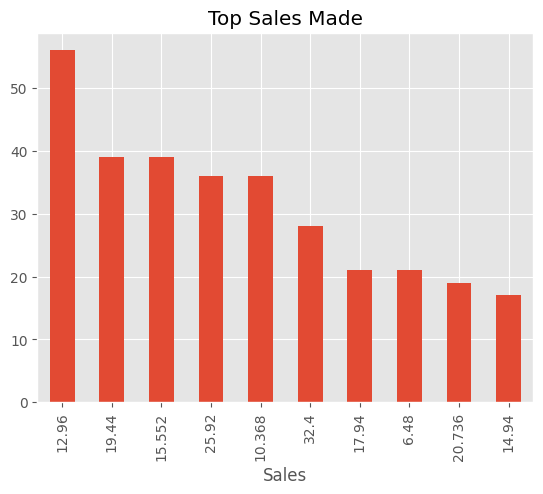

In [15]:
sales.plot(kind = 'bar', title='Top Sales Made')

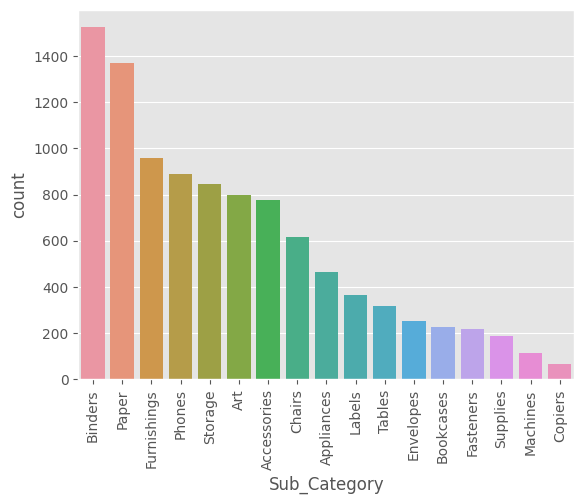

In [37]:
sns.countplot(x='Sub_Category', data=df, order=df['Sub_Category'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

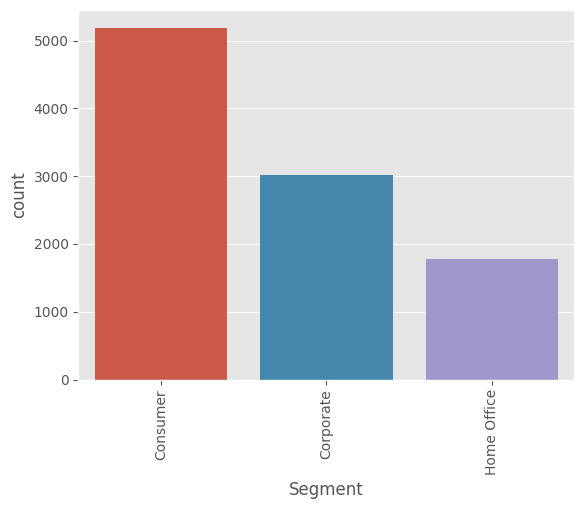

In [39]:
sns.countplot(x='Segment', data=df, order=df['Segment'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

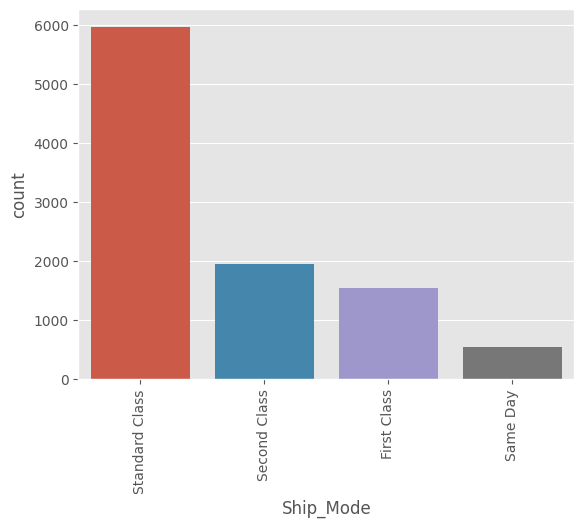

In [40]:
sns.countplot(x='Ship_Mode', data=df, order=df['Ship_Mode'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Sales', ylabel='Profit'>

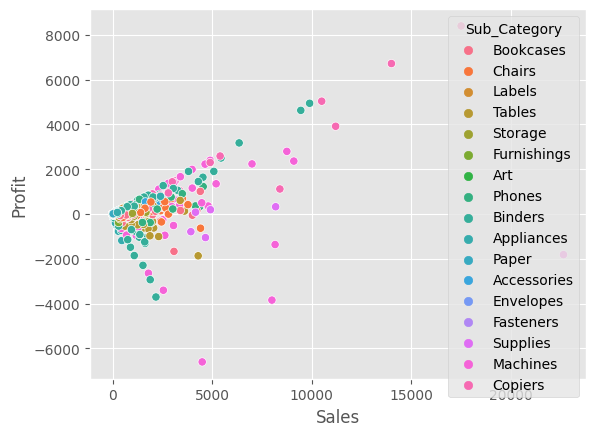

In [52]:
sns.scatterplot(x='Sales', y='Profit',data=df,hue='Sub_Category')

C:\Users\HP\AppData\Local\Programs\Python\Python312\Scripts\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


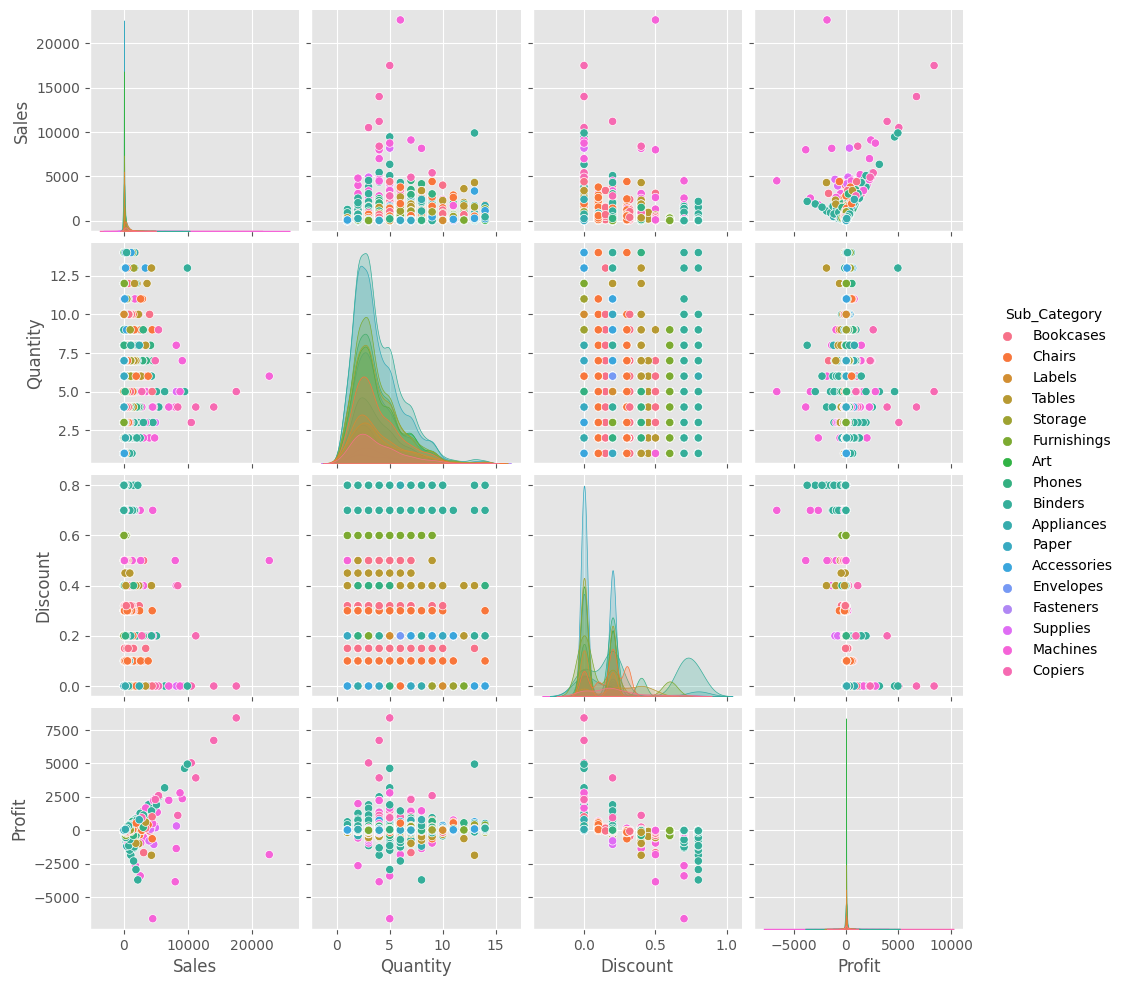

In [77]:
sns.pairplot(data=df, vars=['Sales','Quantity','Discount','Profit'], hue='Sub_Category')
plt.show()

In [54]:
df_corr = df[['Sales','Quantity','Discount','Profit']].corr()
df_corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<Axes: >

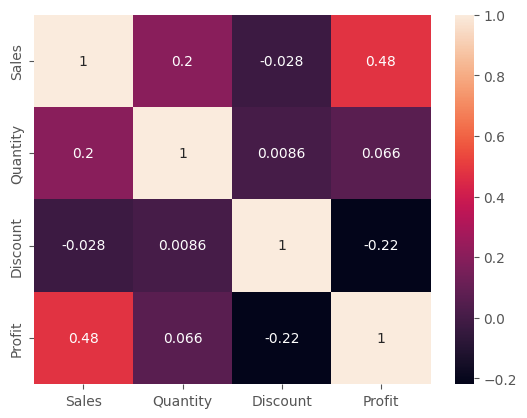

In [56]:
sns.heatmap(df_corr, annot=True)

Questions
- What is the location with the highest number of sales and profit
- Which sub category was purchased the most

In [58]:
df['City'].value_counts()

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

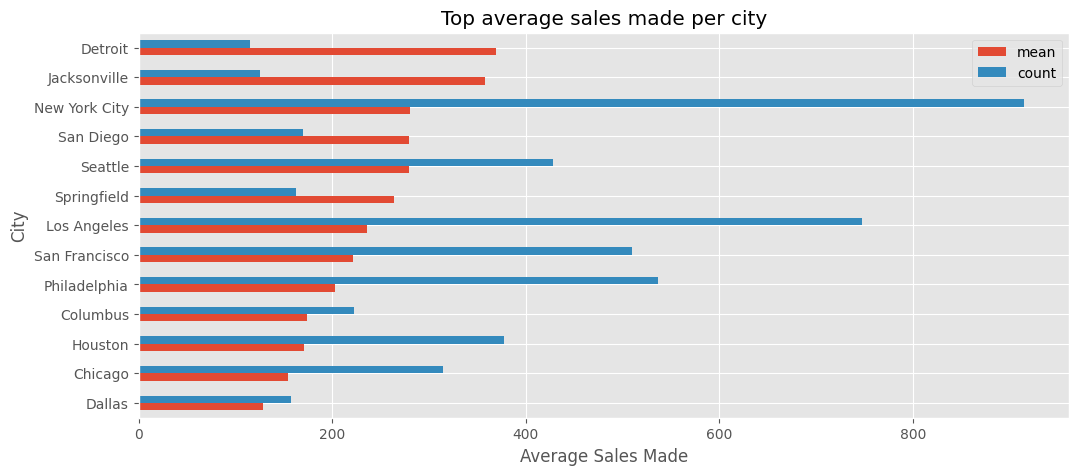

In [76]:
df.groupby('City')['Sales'].agg(['mean','count']).query('count >= 100').sort_values('mean').plot(kind='barh', figsize=(12,5),
                                                                                                 title ='Top average sales made per city')
plt.xlabel('Average Sales Made')
plt.show()

More Sales were made in the City of Detroit even though New York City had the most items 